# Эксперименты

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
import numpy as np
import matplotlib.pyplot as plt

from mars_module import Earth
from pyearth import Earth as PyEarth

from sklearn.datasets import load_boston
from sklearn.datasets import load_linnerud
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def data_plot(X, y, ind=0, title=''):
    """
    Ф-ция печати графика.
    """
    plt.figure()
    plt.plot(X[:, ind], y, 'r.')
    plt.xlabel(f'$x_{ind}$')
    plt.ylabel('$y$')
    plt.title(title)
    plt.show()
    

def fit_plot(X, y, y_pred, max_terms, ind=0):
    """
    Ф-ция печати предсказания модели.
    """
    plt.figure()
    plt.plot(X[:, ind], y, 'r.', label=f'train')
    plt.plot(X[:, ind], y_pred, 'b.', label='train predict')
    #plt.plot(X_test[:, ind], y_test, 'y.', label='test')
    #plt.plot(X_test[:, ind], y_test_pred, 'c.', label='test predict')
    plt.xlabel(f'$x_{ind}$')
    plt.ylabel('$y$')
    plt.title(f'max terms={max_terms}, train dim = {X.shape}')
    plt.legend()
    plt.show()


def fit(X, y, max_terms, ind, isPyEarth=False):
    """
    Ф-ция обучения.
    """
    if isPyEarth:
        model = PyEarth(max_terms=max_terms)
        model.fit(X, y)

        #print(model.trace())
        print(model.summary())
    else:
        model = Earth(max_terms=max_terms)
        model.fit(X, y)

        print('Набор базисных ф-ций:')
        print(model.term_list)
        
        print('Метрики:')
        for metric, value in model.metrics2value.items():
            print(metric, '=', f'{value:.9f}')

        print(f'\nДемонстрация работы pruning: было: {len(model.term_list_forward_)} --> ' + 
              f'стало: {len(model.term_list_backward_)}')
        print(f'lof_value_forward_:  {model.lof_value_forward_:.9f}')
        print(f'lof_value_backward_: {model.lof_value_backward_:.9f}')

    y_pred = model.predict(X)

    fit_plot(X, y, y_pred, max_terms, ind=ind)

## Датасеты

**Boston**

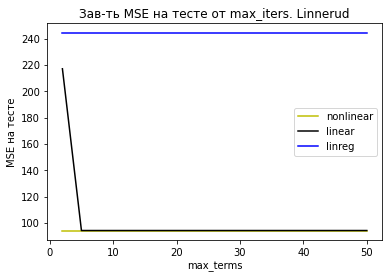

In [22]:
X, y = load_linnerud(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


list_max_terms = list(range(2, 51, 3))

list_mse_mars_nonlinear = []
list_mse_mars_linear = []
list_mse_linreg = []

for max_terms in list_max_terms:
    non_linear_model = PyEarth(max_terms=max_terms, allow_linear=False)
    non_linear_model.fit(X_train, y_train)
    #print(linear_model.summary())
    y_pred = non_linear_model.predict(X_test)
    list_mse_mars_nonlinear.append(np.mean((y_test - y_pred) ** 2))

    linear_model = PyEarth(max_terms=max_terms, allow_linear=True)
    linear_model.fit(X_train, y_train)
    #print(linear_model.summary())
    y_pred = linear_model.predict(X_test)
    list_mse_mars_linear.append(np.mean((y_test - y_pred) ** 2))

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    list_mse_linreg.append(np.mean((y_test - y_pred) ** 2))


plt.figure()
plt.plot(list_max_terms, list_mse_mars_nonlinear, 'y', label='nonlinear')
plt.plot(list_max_terms, list_mse_mars_linear, 'k', label='linear')
plt.plot(list_max_terms, list_mse_linreg, 'b', label='linreg')
plt.title('Зав-ть MSE на тесте от max_iters. Linnerud')
plt.xlabel('max_terms')
plt.ylabel('MSE на тесте')
plt.legend()
plt.show()

**Iris**

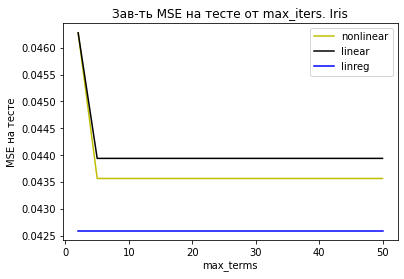

In [23]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


list_max_terms = list(range(2, 51, 3))

list_mse_mars_nonlinear = []
list_mse_mars_linear = []
list_mse_linreg = []

for max_terms in list_max_terms:
    non_linear_model = PyEarth(max_terms=max_terms, allow_linear=False)
    non_linear_model.fit(X_train, y_train)
    #print(linear_model.summary())
    y_pred = non_linear_model.predict(X_test)
    list_mse_mars_nonlinear.append(np.mean((y_test - y_pred) ** 2))

    linear_model = PyEarth(max_terms=max_terms, allow_linear=True)
    linear_model.fit(X_train, y_train)
    #print(linear_model.summary())
    y_pred = linear_model.predict(X_test)
    list_mse_mars_linear.append(np.mean((y_test - y_pred) ** 2))

    reg = LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    list_mse_linreg.append(np.mean((y_test - y_pred) ** 2))


plt.figure()
plt.plot(list_max_terms, list_mse_mars_nonlinear, 'y', label='nonlinear')
plt.plot(list_max_terms, list_mse_mars_linear, 'k', label='linear')
plt.plot(list_max_terms, list_mse_linreg, 'b', label='linreg')
plt.title('Зав-ть MSE на тесте от max_iters. Iris')
plt.xlabel('max_terms')
plt.ylabel('MSE на тесте')
plt.legend()
plt.show()

## Галочки и их суммы

### Галочка

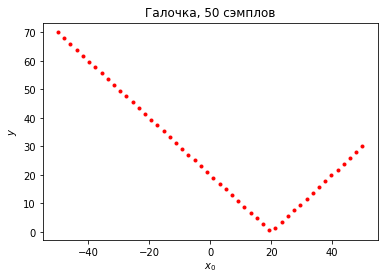

In [52]:
np.random.seed(0)
m = 50
X = np.linspace(-50, 50, m)[:, np.newaxis]
y = np.abs(X[:, 0] - 20.0)

data_plot(X, y, 0, f'Галочка, {m} сэмплов')

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=29.428218289951953

Метрики:
MSE = 401.306122574
MAE = 16.969739416

 Демонстрация работы pruning: было: 1 --> стало: 1
lof_value_forward_:  401.306122574
lof_value_backward_: 401.306122574


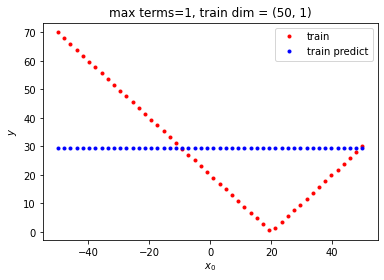

In [82]:
fit(X, y, max_terms=1, ind=0, isPyEarth=False)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.2820636063217958
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=19.388], coeff=0.9575828733299068
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=19.388], coeff=1.0070242250736594

Метрики:
MSE = 0.074087235
MAE = 0.204919331

 Демонстрация работы pruning: было: 3 --> стало: 3
lof_value_forward_:  0.074087235
lof_value_backward_: 0.074087235


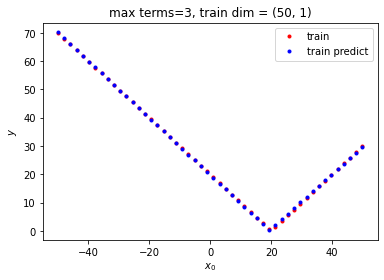

In [83]:
fit(X, y, max_terms=3, ind=0, isPyEarth=False)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=1.9690975300639604
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=19.388], coeff=1.4973407414131399
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=19.388], coeff=0.36555335992919735
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=1.020], coeff=-0.249474092380477
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=1.020], coeff=0.2531266581762559
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=13.265], coeff=-0.05494251789152144
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=31.633], coeff=-0.19486556472355504
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=31.633], coeff=0.1551106420559424
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=25.510], coeff=0.2263454505893419

Метрики:
MSE = 0.010534337
MAE = 0.038634087

 Демонстрация работы pruning: было: 11 --> стало: 9
lof_value_forward_:  0.010542343
lof_value_backward_: 0.010534337


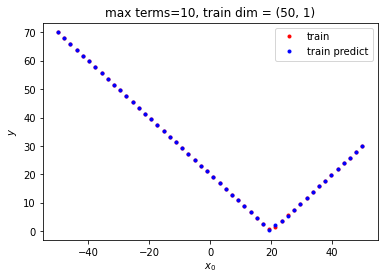

In [84]:
fit(X, y, max_terms=10, ind=0, isPyEarth=False)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=-5.852029793570902
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=19.388], coeff=1.5153099947591149
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=19.388], coeff=0.35110614028681925
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=1.020], coeff=0.004201348733452846
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=13.265], coeff=-0.0570291381638364
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=31.633], coeff=-0.07667220143537175
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=31.633], coeff=0.08439799098219625
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=25.510], coeff=0.2228838879708906
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=31.633], coeff=-0.07667220143984474
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=31.633], coeff=0.08439799098292707
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=31.633], coeff=-0.07667220143809951
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0

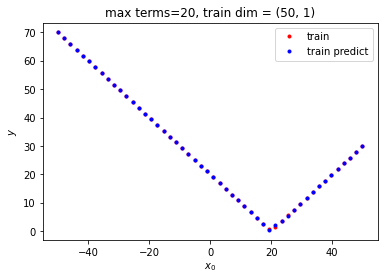

In [85]:
fit(X, y, max_terms=20, ind=0, isPyEarth=False)

### Галочка с большой дисперсией

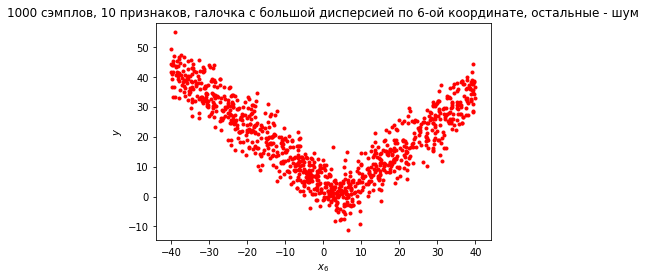

In [86]:
np.random.seed(0)
m = 1000
n = 10
ind = 6
X = 80 * np.random.uniform(size=(m, n)) - 40
y = np.abs(X[:, ind] - 4.0) + 5 * np.random.normal(size=m)

data_plot(X, y, ind, f'{m} сэмплов, {n} признаков, галочка с большой дисперсией по {ind}-ой координате, остальные - шум')

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=18.99097284821738

Метрики:
MSE = 169.910688055
MAE = 11.141244811

 Демонстрация работы pruning: было: 1 --> стало: 1
lof_value_forward_:  169.910688055
lof_value_backward_: 169.910688055


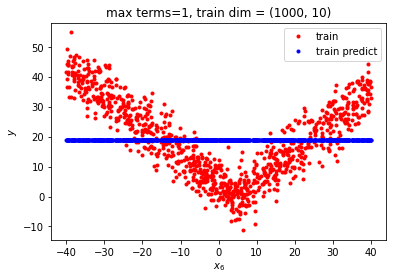

In [87]:
fit(X, y, max_terms=1, ind=ind)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=-0.15865694911194198
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.733], coeff=1.008440064096939
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.733], coeff=0.9754991609235694

Метрики:
MSE = 22.771454108
MAE = 3.790037104

 Демонстрация работы pruning: было: 3 --> стало: 3
lof_value_forward_:  22.771454108
lof_value_backward_: 22.771454108


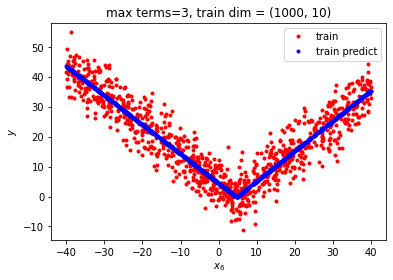

In [88]:
fit(X, y, max_terms=3, ind=ind)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=-0.15075143827972282
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.722], coeff=0.9349162872924239
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.722], coeff=0.9755798807096772
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.722], [<ReluFunc> s=1, v=1, t=13.677], coeff=0.007149504755453429
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.722], [<ReluFunc> s=-1, v=1, t=13.677], coeff=0.001962997759351017



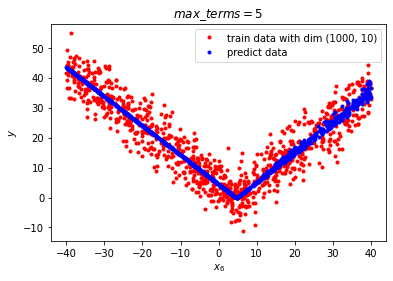

In [31]:
fit(X, y, max_terms=5, ind=ind)

### Сумма 2х галочек

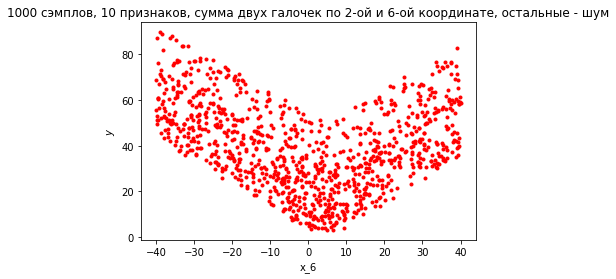

In [32]:
np.random.seed(0)
m = 1000
n = 10
ind = 6
X = 80 * np.random.uniform(size=(m, n)) - 40
y = np.abs(X[:, 6] - 4.0) + np.abs(X[:, 2] + 10.0) + 1 * np.random.normal(size=m)

data_plot(X, y, ind, f'{m} сэмплов, {n} признаков, сумма двух галочек по 2-ой и 6-ой координате, остальные - шум')

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=39.76578565268258



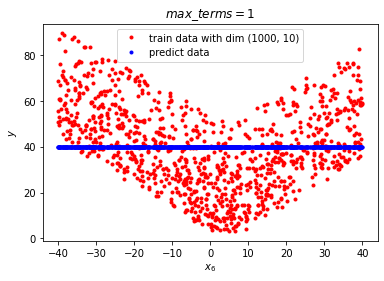

In [33]:
fit(X, y, max_terms=1, ind=6)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=18.225387152559463
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=2, t=-11.149], coeff=1.000766513771371
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=2, t=-11.149], coeff=1.132622873493339



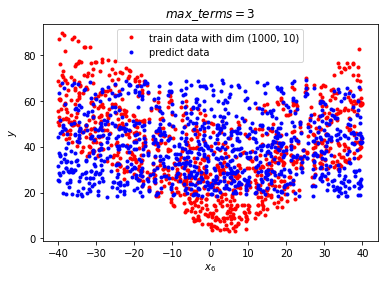

In [34]:
fit(X, y, max_terms=3, ind=6)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=-0.2560567452728216
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=2, t=-11.149], coeff=0.9736798710398797
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=2, t=-11.149], coeff=1.0753810352523219
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.098], coeff=0.9959584133147531
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.098], coeff=0.9949410938483355



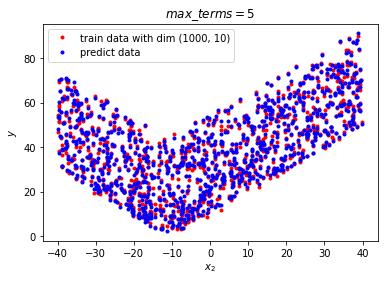

In [35]:
fit(X, y, max_terms=5, ind=2)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.08262894331151262
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=2, t=-11.149], coeff=0.48203652024581767
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=2, t=-11.149], coeff=0.6524728751343188
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.098], coeff=0.9844114143610792
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.098], coeff=1.0007602980758112
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=2, t=-8.584], coeff=0.5198669715131287
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=2, t=-8.584], coeff=0.35556098368664135
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.098], [<ReluFunc> s=1, v=2, t=37.339], coeff=-0.026539225492683477
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.098], [<ReluFunc> s=-1, v=2, t=37.339], coeff=-8.466536915784386e-05
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.098], [<ReluFunc> s=1, v=1, t=14.274], coeff=0.0014819469751183644
[<ConstantFunc> value=1.0], [<ReluFu

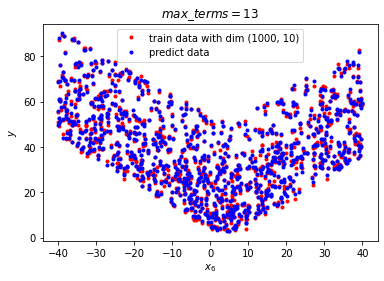

In [36]:
fit(X, y, max_terms=13, ind=6)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.08262894331151262
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=2, t=-11.149], coeff=0.48203652024581767
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=2, t=-11.149], coeff=0.6524728751343188
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.098], coeff=0.9844114143610792
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.098], coeff=1.0007602980758112
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=2, t=-8.584], coeff=0.5198669715131287
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=2, t=-8.584], coeff=0.35556098368664135
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.098], [<ReluFunc> s=1, v=2, t=37.339], coeff=-0.026539225492683477
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.098], [<ReluFunc> s=-1, v=2, t=37.339], coeff=-8.466536915784386e-05
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.098], [<ReluFunc> s=1, v=1, t=14.274], coeff=0.0014819469751183644
[<ConstantFunc> value=1.0], [<ReluFu

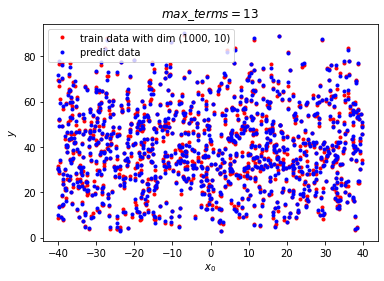

In [37]:
fit(X, y, max_terms=13, ind=0)

### Сумма 5ти галочек

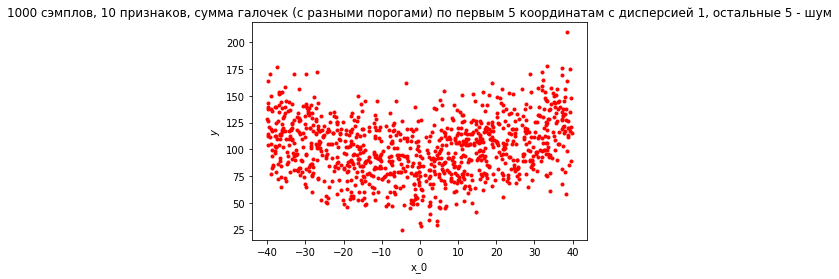

In [38]:
np.random.seed(0)
m = 1000
n = 10
X = 80 * np.random.uniform(size=(m, n)) - 40
y = 0
t = np.random.randint(-10, high=10, size=5)
for i in range(5):
    y += np.abs(X[:, i] - t[i]) + 1 * np.random.normal(size=m)

data_plot(X, y, 0, '1000 сэмплов, 10 признаков, сумма галочек (с разными порогами) по первым 5 координатам с дисперсией 1, остальные 5 - шум')

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=102.02332144360538



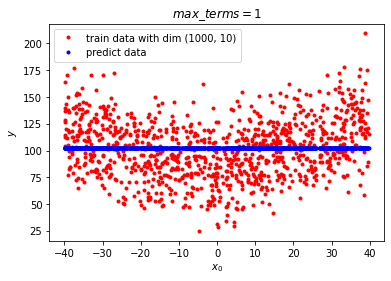

In [39]:
fit(X, y, max_terms=1, ind=0)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=79.55601325763288
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=3, t=7.378], coeff=1.161876824506991
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=3, t=7.378], coeff=1.0017852757514207



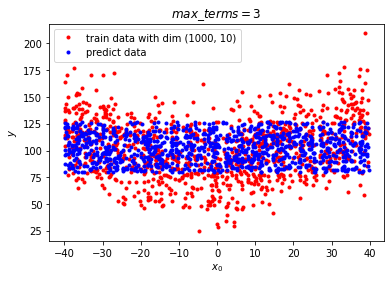

In [40]:
fit(X, y, max_terms=3, ind=0)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.3013850248847345
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=3, t=7.378], coeff=0.4571487622591722
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=3, t=7.378], coeff=0.3796380967527436
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=1, t=-9.150], coeff=0.9975816094475364
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=1, t=-9.150], coeff=0.9924264263780092
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=2, t=-7.083], coeff=1.0249269258033478
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=2, t=-7.083], coeff=0.9450383289265998
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=4, t=0.594], coeff=1.027158698568047
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=4, t=0.594], coeff=0.9838008402814135
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=0, t=-1.795], coeff=1.0019667727356063
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=0, t=-1.795], coeff=0.9863206441563935
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=3, t=3.476], coeff

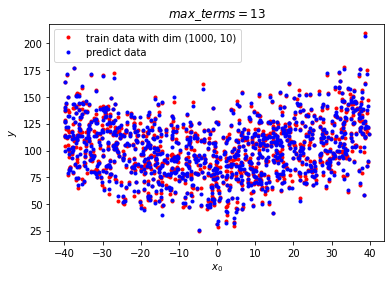

In [41]:
fit(X, y, max_terms=13, ind=0)

## Другие функции

### Синус

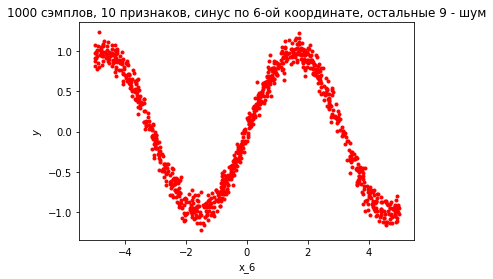

In [42]:
np.random.seed(0)
m = 1000
n = 10
X = 10 * np.random.uniform(size=(m, n)) - 5
y = np.sin(X[:, 6]) + 0.1 * np.random.normal(size=m)

data_plot(X, y, 6, '1000 сэмплов, 10 признаков, синус по 6-ой координате, остальные 9 - шум')

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.008998677315862751



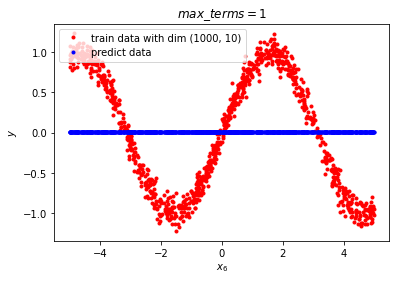

In [43]:
fit(X, y, max_terms=1, ind=6)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.33317164102125724
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=2.570], coeff=-0.6668432789692086
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=2.570], coeff=-0.049511432058129065



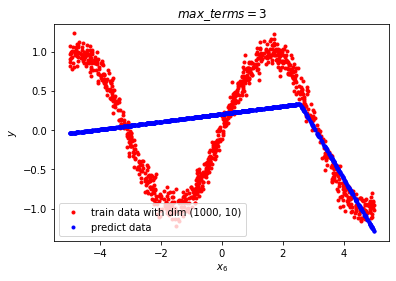

In [44]:
fit(X, y, max_terms=3, ind=6)
#23.0s

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.14796578026949017
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=2.570], coeff=0.20788995095636337
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=2.570], coeff=-0.07602437429788778
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=-1.874], coeff=0.2934361890623101
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=-1.874], coeff=1.1744467825800138
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=1.703], coeff=-1.2100085461863352
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=1.703], coeff=-0.27163505407308586



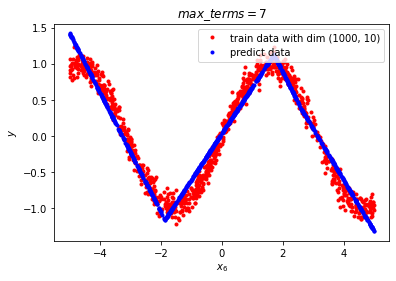

In [45]:
fit(X, y, max_terms=7, ind=6)
#1m33.3s

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.07986362417532614
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=2.570], coeff=-0.35296300455683893
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=2.570], coeff=-0.05409934012613107
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=-1.874], coeff=0.14804417017018784
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=-1.874], coeff=0.5577881163225425
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=1.703], coeff=-0.6761887954296819
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=1.703], coeff=-0.14615569661065958
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=4.051], coeff=0.8515710150058075
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=4.051], coeff=-0.01841901086795334
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=-1.124], coeff=0.2871892883971999
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=-1.124], coeff=0.6142269689310761
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=0.9

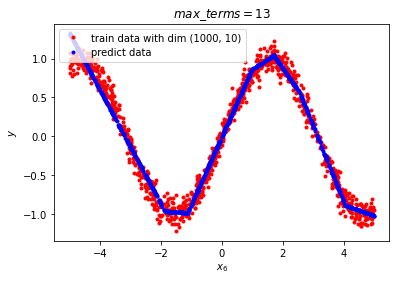

In [46]:
fit(X, y, max_terms=13, ind=6)
#4m57.8s
#2m15.8s

#### Синус + галочка

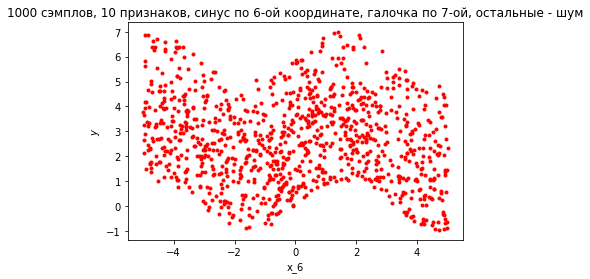

In [47]:
np.random.seed(0)
m = 1000
n = 10
X = 10 * np.random.uniform(size=(m, n)) - 5
y = np.sin(X[:, 6]) + np.abs(X[:, 7] - 1) + 0.01 * np.random.normal(size=m)

data_plot(X, y, 6, '1000 сэмплов, 10 признаков, синус по 6-ой координате, галочка по 7-ой, остальные - шум')

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=2.670002606280946



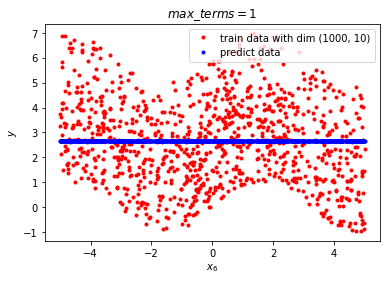

In [48]:
fit(X, y, max_terms=1, ind=6)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.01097522673296832
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=7, t=1.033], coeff=1.0314067247229428
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=7, t=1.033], coeff=0.9846444884519504



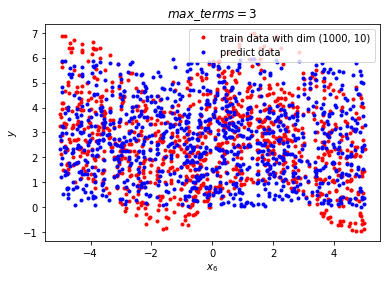

In [49]:
fit(X, y, max_terms=3, ind=6)

Набор базисных ф-ций:
[<ConstantFunc> value=1.0], coeff=0.3621741880305286
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=7, t=1.033], coeff=1.0061891940501577
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=7, t=1.033], coeff=0.9810927559863001
[<ConstantFunc> value=1.0], [<ReluFunc> s=1, v=6, t=2.570], coeff=-0.6626443365892322
[<ConstantFunc> value=1.0], [<ReluFunc> s=-1, v=6, t=2.570], coeff=-0.05006067519282959



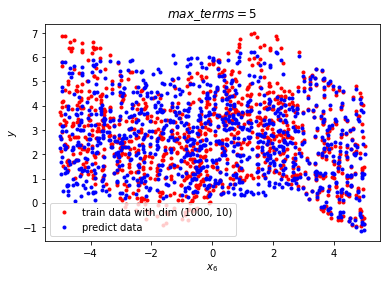

In [50]:
fit(X, y, max_terms=5, ind=6)

In [51]:
fit(X, y, max_terms=13, ind=6)

#### Синус + экспонента

In [ ]:
np.random.seed(0)
m = 1000
n = 10
X = 10 * np.random.uniform(size=(m, n)) - 5
y = np.sin(X[:, 6]) + np.exp(X[:, 7] / 10) + 0.01 * np.random.normal(size=m)

data_plot(X, y, 6, '1000 сэмплов, 10 признаков, синус по 6-ой координате, маленькая экспонента по 7-ой, остальные - шум')

In [ ]:
fit(X, y, max_terms=1, ind=6)

In [ ]:
fit(X, y, max_terms=3, ind=6)

In [ ]:
fit(X, y, max_terms=5, ind=6)

In [ ]:
fit(X, y, max_terms=13, ind=6)

In [ ]:
fit(X, y, max_terms=20, ind=6)

In [ ]:
np.random.seed(0)
m = 1000
n = 10
X = 10 * np.random.uniform(size=(m, n)) - 5
y = np.abs(X[:, 6]) + np.exp(X[:,7] / 3) + 0.1 * np.random.normal(size=m)

data_plot(X, y, 6, '1000 сэмплов, 10 признаков, галка по 6-ой координате, экспонента по 7-ой, остальные- шум')

In [ ]:
fit(X, y, max_terms=1, ind=6)

In [ ]:
fit(X, y, max_terms=3, ind=6)

In [ ]:
fit(X, y, max_terms=5, ind=6)

In [ ]:
fit(X, y, max_terms=13, ind=7)

In [ ]:
fit(X, y, max_terms=20, ind=7)

In [ ]:
np.random.seed(0)

m = 1000
n = 10
X = 10 * np.random.uniform(size=(m,n)) - 5
y = X[:, 6] ** 2 + 0.1 * np.random.normal(size=m)

data_plot(X, y, 6, '1000 сэмплов, 10 признаков, x^2 по 6-ой координате, остальные - шум')

In [ ]:
fit(X, y, max_terms=1, ind=6)

In [ ]:
fit(X, y, max_terms=3, ind=6)

In [ ]:
fit(X, y, max_terms=5, ind=6)

In [ ]:
fit(X, y, max_terms=13, ind=6)

In [ ]:
fit(X, y, max_terms=20, ind=6)

In [ ]:
np.random.seed(0)

m = 10000
n = 10
X = 100 * np.random.uniform(size=(m,n)) - 50
y = (X[:, 6] - 5) ** 3 + 100 * (X[:, 7] + 3) ** 2 + 1000 * (X[:, 8] - 4) + 0.1 * np.random.normal(size=m)

data_plot(X, y, 6, '10000 сэмплов, 10 признаков, (x - 5)^3 + 100(x + 3)^2 + 10000(x - 4) по 6, 7 и 8-ой координате соотв., остальные - шум')

In [ ]:
fit(X, y, max_terms=1, ind=6)

In [ ]:
fit(X, y, max_terms=3, ind=7)

In [ ]:
fit(X, y, max_terms=5, ind=8)

In [ ]:
fit(X, y, max_terms=13, ind=6)

In [ ]:
fit(X, y, max_terms=20, ind=6)